In [1]:
import numpy as np
import ROOT

: 

: 

In [328]:
SIGNAL = "MHc-70_MA-65"
mA = int(SIGNAL.split("_")[1].split("-")[1])
sigma_dict = {65: 0.76,
              85: 1.03,
              90: 1.08,
              95: 1.19,
              120: 1.58}
sigma = sigma_dict[mA]

col_sig = []
f = ROOT.TFile(f"samples/2018/Skim3Mu__GraphNet__/{SIGNAL}/{SIGNAL}.root")
tree = f.Get(f"{SIGNAL}_Central")
for idx, evt in enumerate(tree, start=1):
    condition = (mA - 7*sigma < evt.mass1 < mA + 7*sigma) or (mA - 7*sigma < evt.mass2 < mA + 7*sigma)
    if not condition:
        continue
    col_sig.append([evt.scoreX, evt.scoreY, evt.scoreZ, evt.weight, 1.])
col_sig = np.array(col_sig)

col_VV = []
f = ROOT.TFile(f"samples/2018/Skim3Mu__GraphNet__/{SIGNAL}/diboson.root")
tree = f.Get("diboson_Central")
for idx, evt in enumerate(tree, start=1):
    condition = (mA - 7*sigma < evt.mass1 < mA + 7*sigma) or (mA - 7*sigma < evt.mass2 < mA + 7*sigma)
    if not condition:
        continue
    col_VV.append([evt.scoreX, evt.scoreY, evt.scoreZ, evt.weight, 0.])
col_VV = np.array(col_VV)

col_ttX = []
f = ROOT.TFile(f"samples/2018/Skim3Mu__GraphNet__/{SIGNAL}/ttX.root")
tree = f.Get("ttX_Central")
for idx, evt in enumerate(tree, start=1):
    condition = (mA - 7*sigma < evt.mass1 < mA + 7*sigma) or (mA - 7*sigma < evt.mass2 < mA + 7*sigma)
    if not condition:
        continue
    col_ttX.append([evt.scoreX, evt.scoreY, evt.scoreZ, evt.weight, 0.])
col_ttX = np.array(col_ttX)

col_conv = []
f = ROOT.TFile(f"samples/2018/Skim3Mu__GraphNet__/{SIGNAL}/conversion.root")
tree = f.Get("conversion_Central")
for idx, evt in enumerate(tree, start=1):
    condition = (mA - 7*sigma < evt.mass1 < mA + 7*sigma) or (mA - 7*sigma < evt.mass2 < mA + 7*sigma)
    if not condition:
        continue
    col_conv.append([evt.scoreX, evt.scoreY, evt.scoreZ, evt.weight, 0.])
col_conv = np.array(col_conv)
    
col_fake = []
f = ROOT.TFile(f"samples/2018/Skim3Mu__GraphNet__/{SIGNAL}/nonprompt.root")
tree = f.Get("nonprompt_Central")
for idx, evt in enumerate(tree, start=1):
    condition = (mA - 7*sigma < evt.mass1 < mA + 7*sigma) or (mA - 7*sigma < evt.mass2 < mA + 7*sigma)
    if not condition:
        continue
    col_fake.append([evt.scoreX, evt.scoreY, evt.scoreZ, evt.weight, 0.])
col_fake = np.array(col_fake)

col_others = []
f = ROOT.TFile(f"samples/2018/Skim3Mu__GraphNet__/{SIGNAL}/others.root")
tree = f.Get("others_Central")
for idx, evt in enumerate(tree, start=1):
    condition = (mA - 7*sigma < evt.mass1 < mA + 7*sigma) or (mA - 7*sigma < evt.mass2 < mA + 7*sigma)
    if not condition:
        continue
    col_others.append([evt.scoreX, evt.scoreY, evt.scoreZ, evt.weight, 0.])
col_others = np.array(col_others)
    
col_bkg = np.concatenate([col_VV, col_ttX, col_others, col_conv, col_fake], axis=0)

In [329]:
hX_sig = ROOT.TH1D("hX_sig", "", 100, 0., 1.)
hY_sig = ROOT.TH1D("hY_sig", "", 100, 0., 1.)
hZ_sig = ROOT.TH1D("hZ_sig", "", 100, 0., 1.)
hX_bkg = ROOT.TH1D("hX_bkg", "", 100, 0., 1.)
hY_bkg = ROOT.TH1D("hY_bkg", "", 100, 0., 1.)
hZ_bkg = ROOT.TH1D("hZ_bkg", "", 100, 0., 1.)

for evt in col_sig:
    scoreX, scoreY, scoreZ, weight = tuple(evt[:4])
    hX_sig.Fill(scoreX, weight)
    hY_sig.Fill(scoreY, weight)
    hZ_sig.Fill(scoreZ, weight)
    
for evt in col_bkg:
    scoreX, scoreY, scoreZ, weight = tuple(evt[:4])
    hX_bkg.Fill(scoreX, weight)
    hY_bkg.Fill(scoreY, weight)
    hZ_bkg.Fill(scoreZ, weight)

print(hX_sig.Integral())
print(hX_bkg.Integral())
sigScaleFactor = hX_bkg.Integral() / hX_sig.Integral()
print(sigScaleFactor)

col_sig[:, 3] = col_sig[:, 3]*sigScaleFactor

34.54775630092814
135.0248283014755
3.9083530381927583


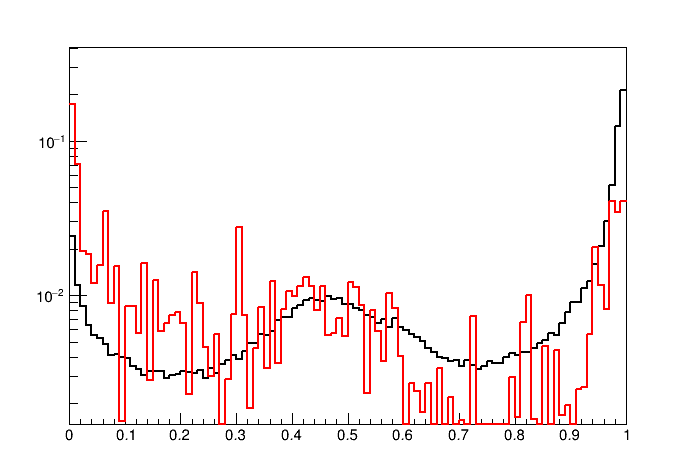

In [330]:
hX_sig.SetLineColor(ROOT.kBlack)
hX_bkg.SetLineColor(ROOT.kRed)

hX_sig.SetLineWidth(2)
hX_bkg.SetLineWidth(2)
hX_sig.Scale(1./hX_sig.Integral())
hX_bkg.Scale(1./hX_bkg.Integral())

hX_sig.SetStats(0)

c = ROOT.TCanvas()
c.SetLogy()
c.cd()
hX_sig.Draw("hist")
hX_bkg.Draw("hist&same")
c.Draw()

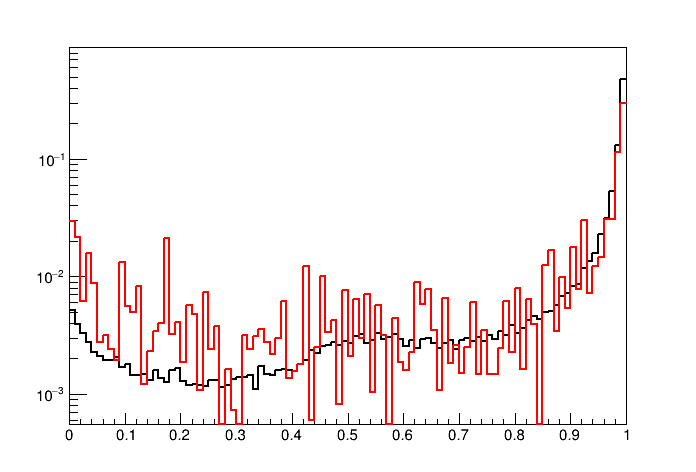

In [331]:
hY_sig.SetLineColor(ROOT.kBlack)
hY_bkg.SetLineColor(ROOT.kRed)

hY_sig.SetLineWidth(2)
hY_bkg.SetLineWidth(2)
hY_sig.Scale(1./hY_sig.Integral())
hY_bkg.Scale(1./hY_bkg.Integral())

hY_sig.SetStats(0)

c = ROOT.TCanvas()
c.SetLogy()
c.cd()
hY_sig.Draw("hist")
hY_bkg.Draw("hist&same")
c.Draw()

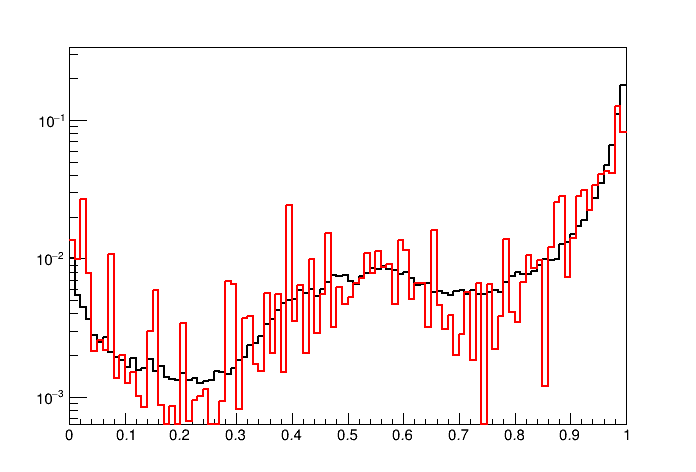

In [332]:
hZ_sig.SetLineColor(ROOT.kBlack)
hZ_bkg.SetLineColor(ROOT.kRed)

hZ_sig.SetLineWidth(2)
hZ_bkg.SetLineWidth(2)
hZ_sig.Scale(1./hZ_sig.Integral())
hZ_bkg.Scale(1./hZ_bkg.Integral())

hZ_sig.SetStats(0)

c = ROOT.TCanvas()
c.SetLogy()
c.cd()
hZ_sig.Draw("hist")
hZ_bkg.Draw("hist&same")
c.Draw()

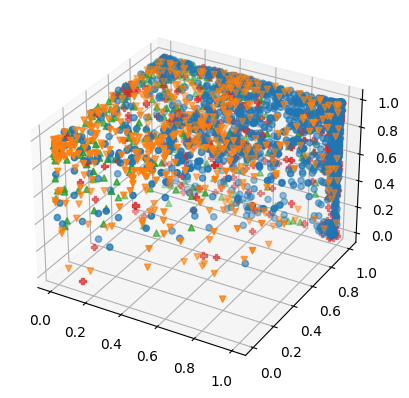

In [333]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(col_sig[:1500, 0], col_sig[:1500, 1], col_sig[:1500, 2], marker="o")
ax.scatter(col_VV[:500, 0], col_VV[:500, 1], col_VV[:500, 2], marker="v")
ax.scatter(col_fake[:500, 0], col_fake[:500, 1], col_fake[:500, 2], marker="^")
ax.scatter(col_ttX[:500, 0], col_ttX[:500, 1], col_ttX[:500, 2], marker="P")

In [334]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [335]:
col_bkg = shuffle(col_bkg, random_state=42)
events = np.concatenate([col_sig, col_bkg], axis=0)
events = shuffle(events, random_state=42)

In [336]:
X, weights, y = events[:, :3], events[:, 3], events[:, 4]

In [337]:
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X, y, weights, test_size=0.4, random_state=42)

In [338]:
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3)
# clf = RandomForestClassifier(n_estimators=50, max_depth=3)
clf.fit(X_train, y_train, sample_weight=sw_train)

GradientBoostingClassifier(n_estimators=50)

In [339]:
clf.feature_importances_

array([0.32070395, 0.20741815, 0.47187789])

0.218 0.0


Warning in <TH1D::KolmogorovTest>: Detected bins with negative weights, these have been ignored and output might be skewed. Reduce number of bins for histogram?


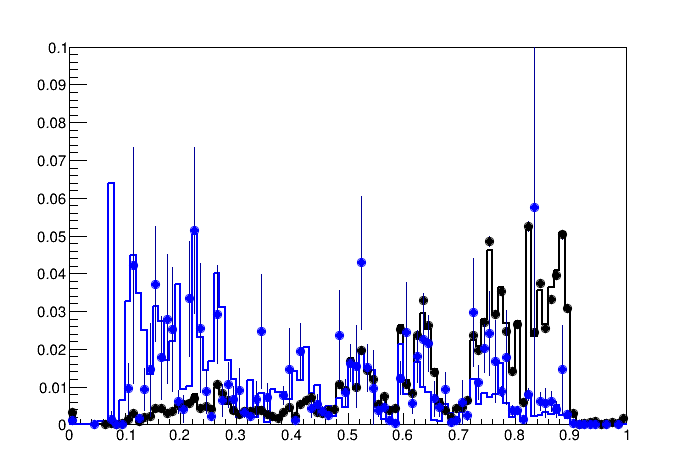

In [340]:
hSigTrain = ROOT.TH1D("hSigTrain", "", 100, 0., 1.)
hBkgTrain = ROOT.TH1D("hBkgTrain", "", 100, 0., 1.)
hSigTest = ROOT.TH1D("hSigTest", "", 100, 0., 1.)
hBkgTest = ROOT.TH1D("hBkgTest", "", 100, 0., 1.)

y_pred = clf.predict_proba(X_train)
for score, weight, label in zip(y_pred, sw_train, y_train):
    if label == 0: hBkgTrain.Fill(score[1], weight)
    else: hSigTrain.Fill(score[1], weight)

y_pred = clf.predict_proba(X_test)
for score, weight, label in zip(y_pred, sw_test, y_test):
    if label == 0: hBkgTest.Fill(score[1], weight)
    else: hSigTest.Fill(score[1], weight)

hSigTrain.SetLineColor(ROOT.kBlack)
hBkgTrain.SetLineColor(ROOT.kBlue)
hSigTrain.SetLineWidth(2)
hBkgTrain.SetLineWidth(2)
hSigTest.SetMarkerStyle(20)
hBkgTest.SetMarkerStyle(20)
hSigTest.SetMarkerSize(1)
hBkgTest.SetMarkerSize(1)
hSigTest.SetMarkerColor(ROOT.kBlack)
hBkgTest.SetMarkerColor(ROOT.kBlue)
hSigTrain.SetStats(0)
hBkgTrain.SetStats(0)

hSigTrain.Scale(1./hSigTrain.Integral())
hBkgTrain.Scale(1./hBkgTrain.Integral())
hSigTest.Scale(1./hSigTest.Integral())
hBkgTest.Scale(1./hBkgTest.Integral())

ksProbSig = hSigTrain.KolmogorovTest(hSigTest, option="X")
ksProbBkg = hBkgTrain.KolmogorovTest(hBkgTest, option="X")

print(ksProbSig, ksProbBkg)

hSigTrain.GetYaxis().SetRangeUser(0., 0.1)
c = ROOT.TCanvas()
#c.SetLogy()
c.cd()
hSigTrain.Draw("hist")
hBkgTrain.Draw("hist&same")
hSigTest.Draw("p&same")
hBkgTest.Draw("p&same")
c.Draw()

2.8582074337409824
56 3.8399989451814296
0.3434990406401061


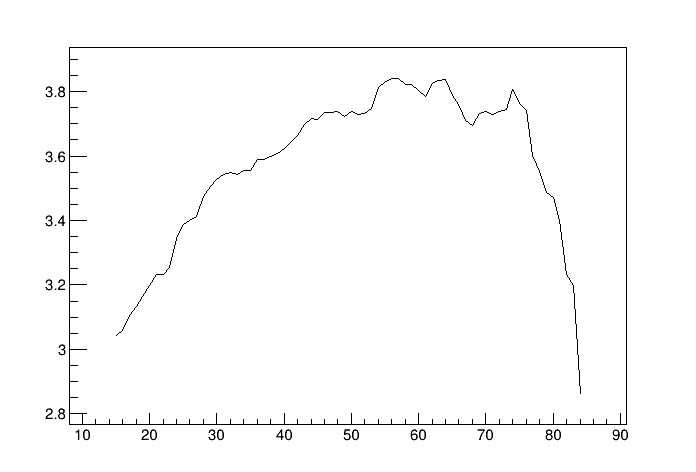

In [341]:
hSig = ROOT.TH1D("hSig", "", 100, 0., 1.)
hBkg = ROOT.TH1D("hBkg", "", 100, 0., 1.)
y_pred = clf.predict_proba(X)
for score, weight, label in zip(y_pred, weights, y):
    if label == 0: hBkg.Fill(score[1], weight)
    else: hSig.Fill(score[1], weight)
hSig.Scale(1./sigScaleFactor)

from math import sqrt, log

nBins = hSig.GetNbinsX()
nSig = hSig.Integral(0, nBins+1)
nBkg = hBkg.Integral(0, nBins+1)
initMetric = sqrt(2*((nSig+nBkg)*log(1+nSig/nBkg)-nSig))
print(initMetric)

graph = ROOT.TGraph()
bestCut = 0
bestMetric = initMetric
for bin in range(15, nBins-15):
    nSig = hSig.Integral(bin, nBins+1)
    nBkg = hBkg.Integral(bin, nBins+1)
    try:
        metric = sqrt(2*((nSig+nBkg)*log(1+nSig/nBkg)-nSig))
        graph.AddPoint(bin, metric)
    except:
        print(bin, nSig, nBkg)
        continue
    if metric > bestMetric:
        bestCut = bin
        bestMetric = metric

print(bestCut, bestMetric)
print((bestMetric-initMetric) / initMetric)

c = ROOT.TCanvas()
c.cd()
graph.Draw()
c.Draw()

In [344]:
# save classifier
import pickle

In [345]:
saved_model = pickle.dumps(clf)

In [346]:
print(saved_model)

b'\x80\x04\x955\xf3\x00\x00\x00\x00\x00\x00\x8c\x14sklearn.ensemble._gb\x94\x8c\x1aGradientBoostingClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\x0cn_estimators\x94K2\x8c\rlearning_rate\x94G?\xb9\x99\x99\x99\x99\x99\x9a\x8c\x04loss\x94\x8c\x08log_loss\x94\x8c\tcriterion\x94\x8c\x0cfriedman_mse\x94\x8c\x11min_samples_split\x94K\x02\x8c\x10min_samples_leaf\x94K\x01\x8c\x18min_weight_fraction_leaf\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\tsubsample\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\x0cmax_features\x94N\x8c\tmax_depth\x94K\x03\x8c\x15min_impurity_decrease\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\tccp_alpha\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x04init\x94N\x8c\x0crandom_state\x94N\x8c\x05alpha\x94G?\xec\xcc\xcc\xcc\xcc\xcc\xcd\x8c\x07verbose\x94K\x00\x8c\x0emax_leaf_nodes\x94N\x8c\nwarm_start\x94\x89\x8c\x13validation_fraction\x94G?\xb9\x99\x99\x99\x99\x99\x9a\x8c\x10n_iter_no_change\x94N\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x0en_features_in_\x94K\x03\x8c\x08classes_\x94\x8c\x15numpy

In [347]:
clf_from_pickle = pickle.loads(saved_model)

0.206 0.003


Warning in <TFile::Append>: Replacing existing TH1: hSigTrain (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hBkgTrain (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hSigTest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hBkgTest (Potential memory leak).
Warning in <TH1D::KolmogorovTest>: Detected bins with negative weights, these have been ignored and output might be skewed. Reduce number of bins for histogram?


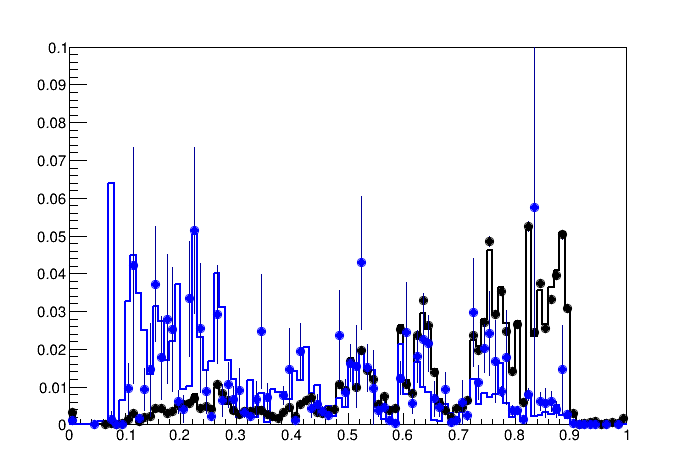

In [348]:
hSigTrain = ROOT.TH1D("hSigTrain", "", 100, 0., 1.)
hBkgTrain = ROOT.TH1D("hBkgTrain", "", 100, 0., 1.)
hSigTest = ROOT.TH1D("hSigTest", "", 100, 0., 1.)
hBkgTest = ROOT.TH1D("hBkgTest", "", 100, 0., 1.)

y_pred = clf_from_pickle.predict_proba(X_train)
for score, weight, label in zip(y_pred, sw_train, y_train):
    if label == 0: hBkgTrain.Fill(score[1], weight)
    else: hSigTrain.Fill(score[1], weight)

y_pred = clf_from_pickle.predict_proba(X_test)
for score, weight, label in zip(y_pred, sw_test, y_test):
    if label == 0: hBkgTest.Fill(score[1], weight)
    else: hSigTest.Fill(score[1], weight)

hSigTrain.SetLineColor(ROOT.kBlack)
hBkgTrain.SetLineColor(ROOT.kBlue)
hSigTrain.SetLineWidth(2)
hBkgTrain.SetLineWidth(2)
hSigTest.SetMarkerStyle(20)
hBkgTest.SetMarkerStyle(20)
hSigTest.SetMarkerSize(1)
hBkgTest.SetMarkerSize(1)
hSigTest.SetMarkerColor(ROOT.kBlack)
hBkgTest.SetMarkerColor(ROOT.kBlue)
hSigTrain.SetStats(0)
hBkgTrain.SetStats(0)

hSigTrain.Scale(1./hSigTrain.Integral())
hBkgTrain.Scale(1./hBkgTrain.Integral())
hSigTest.Scale(1./hSigTest.Integral())
hBkgTest.Scale(1./hBkgTest.Integral())

ksProbSig = hSigTrain.KolmogorovTest(hSigTest, option="X")
ksProbBkg = hBkgTrain.KolmogorovTest(hBkgTest, option="X")

print(ksProbSig, ksProbBkg)

hSigTrain.GetYaxis().SetRangeUser(0., 0.1)
c = ROOT.TCanvas()
#c.SetLogy()
c.cd()
hSigTrain.Draw("hist")
hBkgTrain.Draw("hist&same")
hSigTest.Draw("p&same")
hBkgTest.Draw("p&same")
c.Draw()

In [349]:
import joblib

In [350]:
joblib.dump(clf, "test.pkl")

['test.pkl']

In [351]:
clf_from_joblib = joblib.load("test.pkl")

0.287 0.0


Warning in <TFile::Append>: Replacing existing TH1: hSigTrain (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hBkgTrain (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hSigTest (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hBkgTest (Potential memory leak).
Warning in <TH1D::KolmogorovTest>: Detected bins with negative weights, these have been ignored and output might be skewed. Reduce number of bins for histogram?


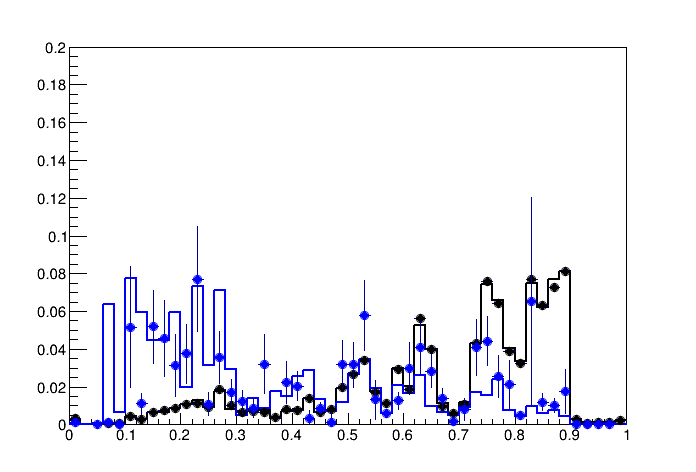

In [356]:
hSigTrain = ROOT.TH1D("hSigTrain", "", 50, 0., 1.)
hBkgTrain = ROOT.TH1D("hBkgTrain", "", 50, 0., 1.)
hSigTest = ROOT.TH1D("hSigTest", "", 50, 0., 1.)
hBkgTest = ROOT.TH1D("hBkgTest", "", 50, 0., 1.)

y_pred = clf_from_joblib.predict_proba(X_train)
for score, weight, label in zip(y_pred, sw_train, y_train):
    if label == 0: hBkgTrain.Fill(score[1], weight)
    else: hSigTrain.Fill(score[1], weight)

y_pred = clf_from_joblib.predict_proba(X_test)
for score, weight, label in zip(y_pred, sw_test, y_test):
    if label == 0: hBkgTest.Fill(score[1], weight)
    else: hSigTest.Fill(score[1], weight)

hSigTrain.SetLineColor(ROOT.kBlack)
hBkgTrain.SetLineColor(ROOT.kBlue)
hSigTrain.SetLineWidth(2)
hBkgTrain.SetLineWidth(2)
hSigTest.SetMarkerStyle(20)
hBkgTest.SetMarkerStyle(20)
hSigTest.SetMarkerSize(1)
hBkgTest.SetMarkerSize(1)
hSigTest.SetMarkerColor(ROOT.kBlack)
hBkgTest.SetMarkerColor(ROOT.kBlue)
hSigTrain.SetStats(0)
hBkgTrain.SetStats(0)

hSigTrain.Scale(1./hSigTrain.Integral())
hBkgTrain.Scale(1./hBkgTrain.Integral())
hSigTest.Scale(1./hSigTest.Integral())
hBkgTest.Scale(1./hBkgTest.Integral())

ksProbSig = hSigTrain.KolmogorovTest(hSigTest, option="X")
ksProbBkg = hBkgTrain.KolmogorovTest(hBkgTest, option="X")

print(ksProbSig, ksProbBkg)

hSigTrain.GetYaxis().SetRangeUser(0., 0.2)
c = ROOT.TCanvas()
#c.SetLogy()
c.cd()
hSigTrain.Draw("hist")
hBkgTrain.Draw("hist&same")
hSigTest.Draw("p&same")
hBkgTest.Draw("p&same")
c.Draw()